12/18 8장

# 8-1. 합성곱 신경망의 구성 요소

- 도장 찍듯이 유용한 이미지 특징을 드러나게 해야함(합성곱)
- 앞 7장에서 사용한 밀집층에는 입력 개수만큼의 가중치가 있었음= 모든 입력에 가중치를 곱했음
-> 인공 신경망은 가중치 w1~wn과 절편 b를 랜덤하게 초기화한 다음 에포크를 반복하면서 경사하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치, 절편 찾음 = 모델 훈련
-> 밀집층에 뉴런이 3개 있다면 출력은 3개가 됨. (입력 개수에 상관없이 동일함) ex) 패션 MNIST 이미지에 있는 784개의 픽셀(왼쪽)을 입력받는 은닉층의 뉴런 개수가 10개(오른쪽)면 뉴런마다 하나씩 출력도 10개.

## 합성곱

- 합성곱 밀집층 계산은 다름. 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱함.
- 합성곱 층-풀링 층

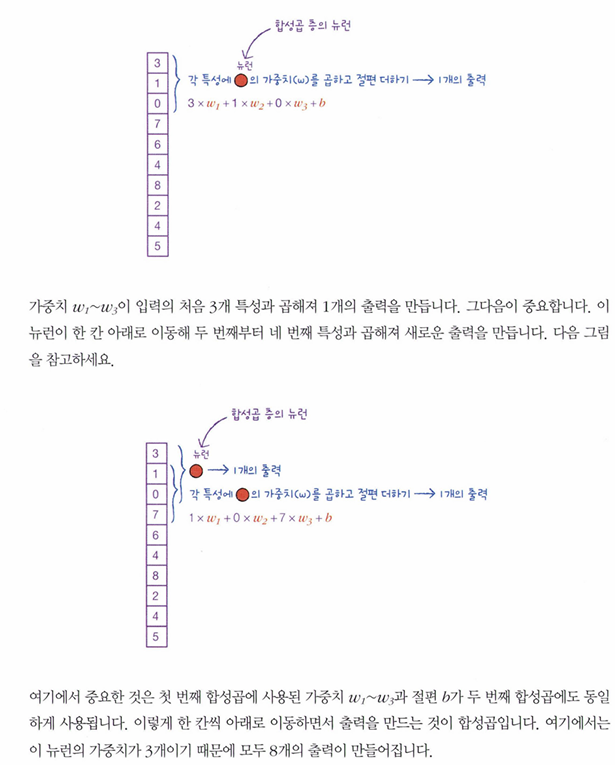


-차이점
- 밀집층의 뉴런은 입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만듦.
- 합성곱 층의 뉴런은 3개의 가중치를 가지고 8개의 출력을 만듦. (3개는 예시고, 가중치 개수는 하이퍼파라미터로 정하기 나름)

뉴런 = 필터(뉴런 개수 ex)3x3)= 커널(입력에 곱해지는 가중치 ex) 커널의 9개 가중치)


## 특성 맵 (feature map)
- 합성곱의 장점: 1차원이 아니라 2차원 입력에도 적용 가능
- 2차원 배열에서도 도장찍듯이 4X4 2차원 배열에서 3X3 필터 적용하면 총 4개의 출력 생성 (각 1개의 출력에서 입력의 9개의 원소와 커널의 9개 가중치를 곱한 후, 절편까지 다 더함)
-> 2x2 크기의 2차원 배열로 표현 가능
- 이렇게 합성곱 계산을 통해 얻은 출력을 특성 맵이라고 함.

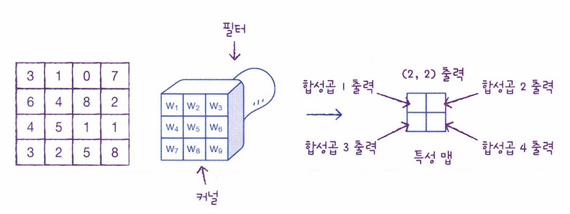

- 필터, 커널 같은 말이지만 다르게 표현함

- 밀집층에서 여러 개의 뉴런을 사용하듯이 합성곱 층에서도 여러 개의 필터 사용
- 아래 그림처럼 (2, 2) 크기의 특성 맵을 쌓으면 3차원 배열되므로 (2,2,3) 크기의 3차원 배열

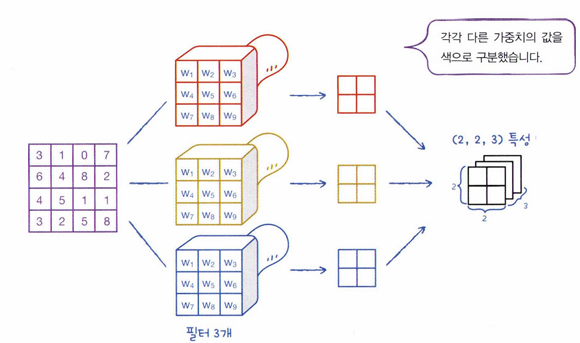

- 앞 장의 밀집층과 다른 점은 뉴런이 2차원 형태를 유지하고, 입력보다 훨씬 작은 크기의 커널을 사용하여 입력 위를 이동하면서 2차원 특성 맵 생성. -> 2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이 이미지 처리 분야에서 뛰어난 성능 발휘.

## 케라스 합성곱 층
- 케라스의 층은 모두 keras.layers 패키지 아래 클래스로 구현되어있음.
- 입력 위를 이동하는 합성곱은 Conv2D 클래스로 제공
- Conv2D 클래스의 매개변수는 필터의 개수,  커널의 크기(kernel_size=)가 필수 매개변수. 다음으로는, 활성화 함수 지정


```
from tersorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')
```




## 합성곱 신경망
- 정의: 1개 이상의 합성곱 층을 쓴 인공 신경망, 꼭 합성곱 층만 사용한 신경망 아니고, 이전 장에서 클래스에 대한 확률 계산을 위하여 마지막 층에 클래스 개수만큼의 뉴런을 가진 밀집층 두는 것이 일반적인 것처럼!

## 패딩
- (4, 4) 크기의 입력에 (3, 3) 크기의 커널을 적용하여 (2, 2) 크기의 특성 맵 생성했지만, 입력과 동일하게 (4, 4) 크기의 특성 맵 생성하고 싶다면?
- -> 입력을 더 크게 만들어서 계산해야함. (4, 4)를 (6, 6)으로 만들어야함.

> 이렇게 입력 배열의 주위를 가상의 원소로 채우는 것을 패딩이라고 함.

- same padding: 실제 입력 값이 아니기 때문에 패딩은 0으로 채움. (계산에 영향 x)
- valid padding: 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵 만듦(맵 크기 작아짐)

- 패딩을 안 하면, 각 모서리의 원소들은 한 번만 계산되고, 가운데 4개 원소는 두드러지게 표현됨.

- 케라스에서 padding 매개변수 지정가능함. 기본값은 'valid'로 패딩 x, padding='same' 이라고 하면 패딩 0으로 채움.
- 상하좌우 1줄씩 패딩 추가 = 1픽셀이 입력 데이터 주변에 추가됨.



```
 keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')
```





## 스트라이드
- 합성곱 연산은 좌우, 위아래로 한 칸씩 이동.
- 이동의 크기 기본은 1이지만, 케라스로 지정 가능.
- 1보다 크게 지정하면 특성 맵 크기 작아질 수 밖에 없음.
- 잘 사용하지 않은 매개변수...


```
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=l)
```



## 풀링
> 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할 (특성 맵에 커널 없는 필터를 적용한다고 생각하기)

- 하지만, 특성 맵의 개수는 줄이지 않음! 크기는 줄이고, 개수는 그대로 ex) (2, 2, 3) -> 특성 맵에 풀링 적용하면 (1, 1, 3)로 마지막 차원인 개수는 그대로 유지하고, 너비와 높이만 줄어듦.
- 풀링도 합성곱처럼 입력 위를 지나가면서 도장을 찍지만, 가중치가 없음. 영역 중 가장 큰 값을 고르거나(최대 풀링), 평균값을 계산함(평균 풀링)
- 풀링 영역은 겹치지 않고 이동하므로 풀링의 크기가 (2, 2)이면 가로세로 두 칸씩 이동=스트라이드 2
- +) 합성곱 층과 풀링 층에서 출력되는 값을 모두 특성 맵이라고 함.


```
 keras.layers.MaxPooling2D(2)
 keras.layers.MaxPooling2D(2, Strides=2, padding='valid')
```
- 보통 풀링의 크기는 2
- 코드 위, 아래 다 같은 뜻임. 풀링에 strides와 valid 모두 포함.
-
- 아래 두 번째 그림은 최대 풀링



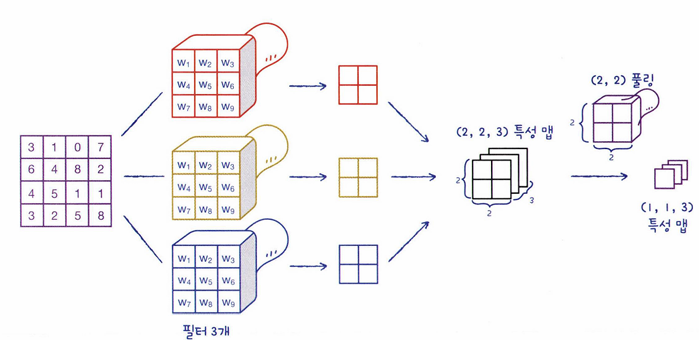

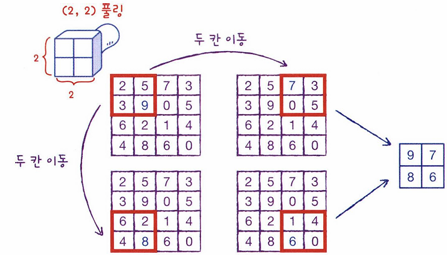

## 합성곱 신경망의 전체 구조 (아래 사진 참고)
 1) 합성곱 층(세임 패딩)
 - 합성곱 층에서 사용한 커널의 크기 (3, 3)이고, same padding으로 1픽셀씩 추가됨.
 - 이때, 패딩은 텐서플로에서 자동으로 추가하므로 수동으로 입력에 어떤 작업을 추가할 필요 x

```
 keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')
```
 - 패딩이 추가된 입력(4, 4)에서 합성곱 수행됨.
 - 합성곱의 필터는 3개. 각기 (3, 3) 크기 가중치를 갖고 있으며 필터마다 절편(b)이 하나씩 존재. 필터의 가중치는 각기 서로 다름.
 - 합성곱의 스트라이드는 언급이 없다면 항상 1(이동거리)이라서 특성 맵 크기 (4, 4, 3) 생성
 - 합성곱 층에서 활성화 함수를 적용하여 최종 특성 맵 생성 (활성화 함수로 렐루 함수를 많이 사용)

2) 풀링 층
 - 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이고, 개수는 그대로. 보통 (2, 2) 풀링을 사용해 절반으로 줄임. (4, 4, 3) -> (2, 2, 3)
 - 풀링 사용 이유: 합성곱에서 스트라이드를 크게 하여 특성 맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 더 나은 성능을 내기 때문임.

3) 밀집 층
 - 밀집층인 출력층에 전달하려면 이 3차원 배열을 Flatten 클래스로 1차원으로 펼쳐야함.
 - 이 배열은 12개의 원소를 가진 1차원 배열이고 출력층의 입력이 됨.
 - 3개의 클래스를 분류하는 다중 분류 문제로 출력층에는 3개의 뉴런을 둠.
 - 출력층에서 계산된 값을 소프트맥스 활성화 함수를 거쳐 최종 예측 확률이 됨.


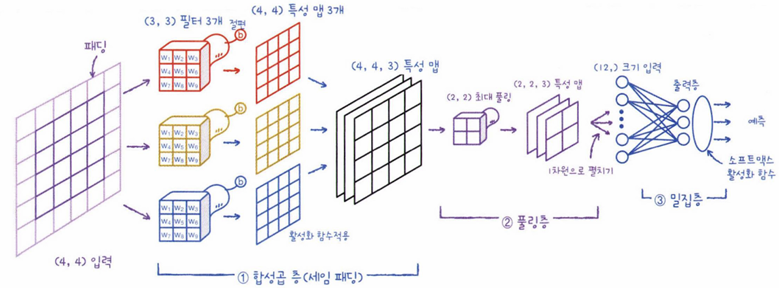

# 8-2. 합성곱 신경망을 사용한 이미지 분류
- 케라스 API를 사용해 합성곱 신경망 모델을 만들어 패션 MNIST 이미지 분류하기


- 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳤지만, 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 일렬로 펼칠 필요 X
- 다만, 입력 이미지는 항상 깊이(채널) 차원이 있어야함. 흑백 이미지의 경우 채널 차원이 없는 2차원 배열이지만 Conv2D층을 사용하기 위해 마지막에 이 채널 차원을 추가해야함.

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0  # reshape를 사용하여 마지막 차원 추가 및 정규화 (0~1 사이로)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


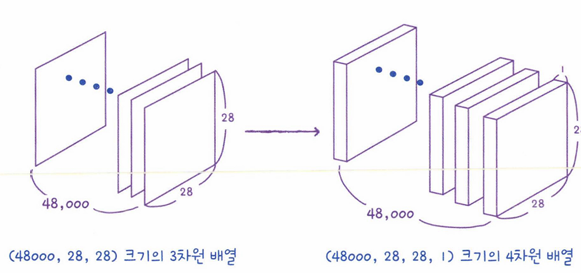

## 합성곱 신경망 만들기
- 이미지에서 특징을 감지한 후 밀집층으로 클래승 따른 분류 확률을 계산함.


### 1) Sequential 클래스의 객체를 만듦

In [ ]:
# 1. Sequentail 클래스의 객체를 만듦
model = keras.Sequential()

### 2) 첫 번째 합성곱 층인 Conv2D를 추가함.

In [ ]:
# 2. 첫 번째 합성곱 층인 Conv2D를 추가함.
# 32개의 필터, 커널 크기는 (3,3), 렐루 활성화 함수, 세임 패딩
# 첫 번째 층에서 입력의 차원을 지정해줘야함
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


-> 세임 패딩 적용했기에 출력된 특성 맵의 가로세로 크기는 입력과 동일.
- 합성곱 층에서 32개의 필터를 사용했기 때문에 이 특성 맵의 깊이는 32가 됨.

### 3) 풀링 층 추가

In [ ]:
# 3. 풀링 층 (2,2) 추가 (Max와 Average 클래스 제공)
model.add(keras.layers.MaxPooling2D(2))

-> (2,2) 풀링 적용해서 특성 맵의 크기는 (14,14,32)로 절반으로 줄어듦.

### 4) 첫 번째 합성곱-풀링 층 다음에 두 번째 합성곱-풀링 층을 추가
- 필터의 개수를 64개로 늘린 점만 다름.

In [ ]:
# 2-2. 두 번째 합성곱 층인 Conv2D를 추가함.
# 3-2. 풀링 층 (2,2) 추가

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

-> 최종 특성 맵의 크기는 (7,7,64)가 됨.


### 5) 3차원 특성 맵을 일렬로 펼침
- 마지막에 10개의 뉴런을 가진 (밀집) 출력층에서 확률을 계산하기 때문.
- 특성 맵을 일렬로 펼쳐서 바로 출력층에 전달하지 않고 중간에 하나의 밀집 은닉층을 하나 더 두도록 함.
- -> Flatten 클래스 다음에 Dense 은닉층, 마지막으로 Dense 출력층의 순서대로 구성.


In [ ]:
# 은닉층과 출력층 사이에 드롭아웃을 넣음.
# 드롭아웃 층이 은닉층의 과대적합을 막아 성능 개선
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

-> 은닉층은 100개의 뉴런을 사용하고 렐루 활성화 함수 사용
- 은닉층과 출력층 사이에 드롭아웃(무작위로 뉴런 일부를 학습 과정에서 비활성화하는 것) 층을 넣어 은닉층의 과대적합을 막아 성능 개선 (모델이 특정 뉴런에 의존하지 않도록)
- 10개를 분류하는 다중 분류 문제이므로 마지막 층의 활성화함수는 소프트맥스를 사용.


### 모델 구조

In [ ]:
# 모델 구조 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

- 합성곱 층: 첫 번째 층 통과하면서 특성 맵 깊이 32가 되고, 두 번째 층 특성 맵의 크기가 64로 늘어남.
- 풀링 층: 첫 번째 층에서 절반으로 줄어들고, 두 번째 층에서 다시 절반으로 더 줄어듦.
- 모델 파라미터의 개수:
- - 첫 번째 합성곱 층 - 32개의 필터, 크기 (3,3), 깊이 1, 필터마다 하나의 절편 있으므로 3 x 3 x 1 x 32 + 32 =320개
- - 두 번째 합성곱 층 - 3 x 3 x 32(깊이) x 64 + 64 = 18,496
- - 은닉층 - (7,7,64) 크기의 특성 맵을 1차원 배열로 펼치면 (3136,) 크기 배열이 되고, 이를 100개의 뉴런과 완전히 연결해야하므로 3,136 x 100 + 100 = 313,700
- - 마지막 출력층 - 100 x 10 + 10 = 1,010


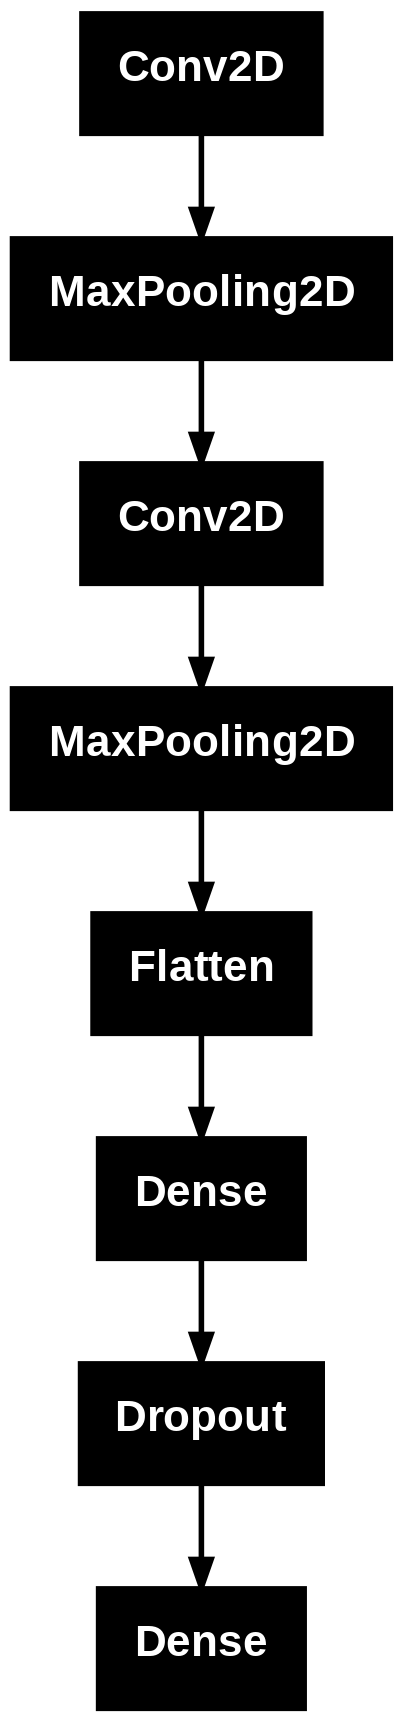

In [ ]:
keras.utils.plot_model(model)

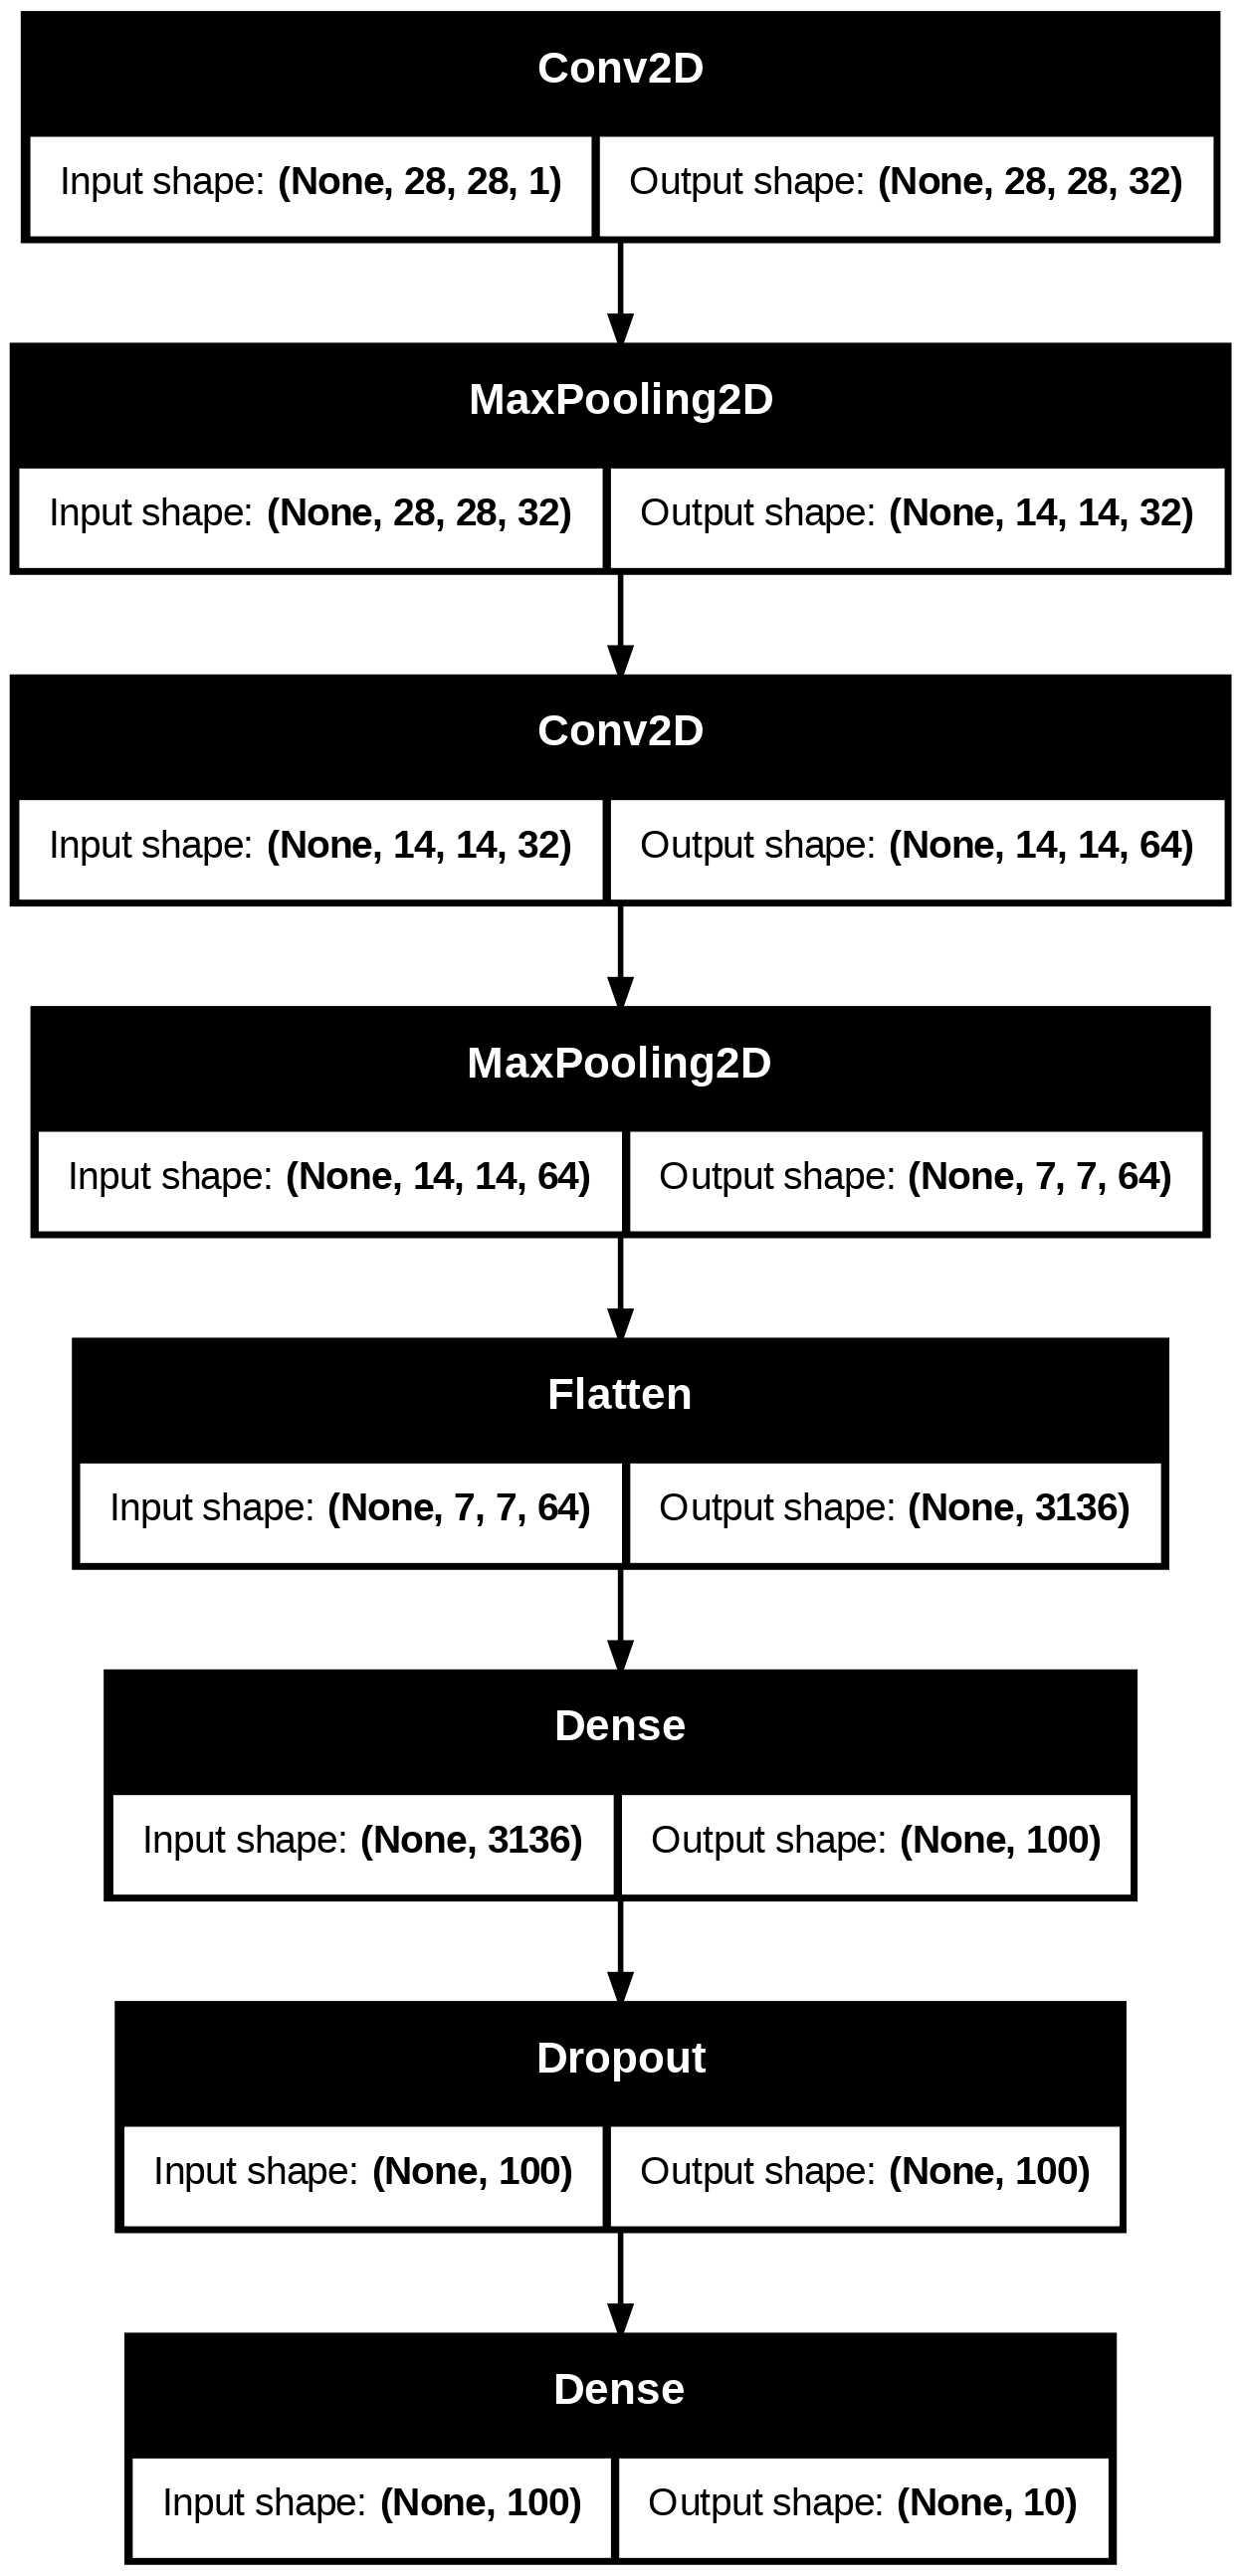

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

지금까지 만든 신경망 구조 그림으로 살펴보기

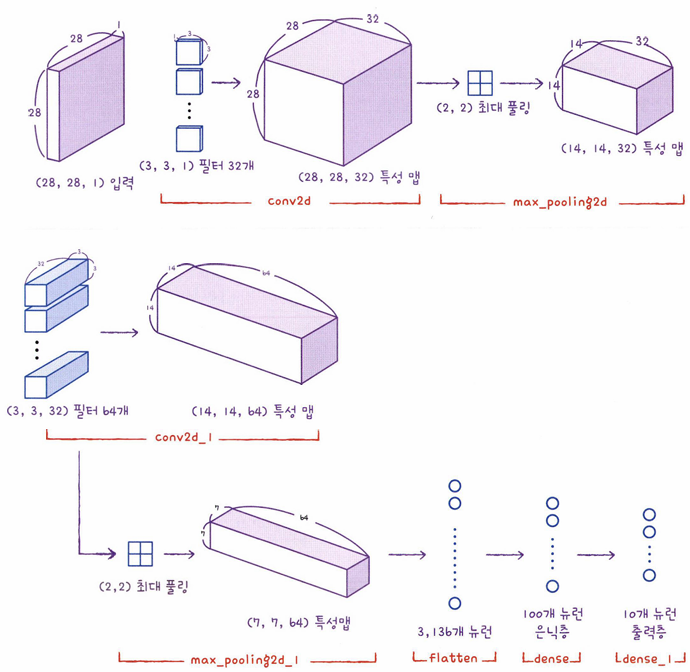

## 합성곱 신경망 모델 컴파일 및 훈련
- 앞에서 완전 연결 신경망 모델을 컴파일하고 훈련하는 코드와 동일
- Adam 옵티마이저 사용하고 ModelCheckpoint 콜백과 EarlyStopping 콜백 함께 사용하여 조기 종료 기법 구현


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 45ms/step - accuracy: 0.9262 - loss: 0.2006 - val_accuracy: 0.9201 - val_loss: 0.2292
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.9311 - loss: 0.1860 - val_accuracy: 0.9147 - val_loss: 0.2520
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.9342 - loss: 0.1735 - val_accuracy: 0.9176 - val_loss: 0.2473


In [ ]:
import matplotlib.pyplot as plt

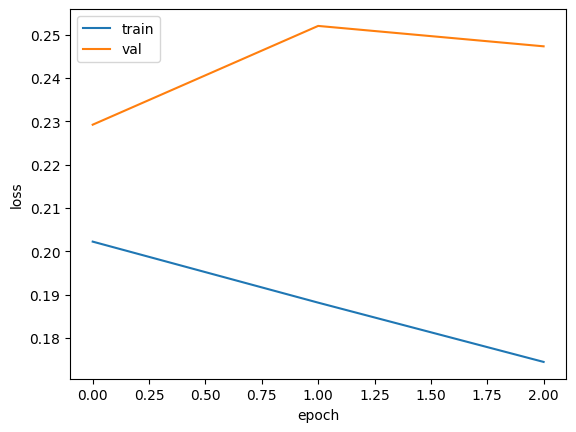

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- EarlyStopping 클래스에서 restore_best_weights 매개변수를 True로 지정했으므로 현재 model 객체가 최적의 모델 파라미터로 복원되어 있음.
- 즉, ModelCheckpoint 콜백이 저장한 best-cnn-model.keras 파일을 다시 읽을 필요가 없음.

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9216 - loss: 0.2234


[0.2292388528585434, 0.9200833439826965]

-> fit() 메서드의 출력 중 아홉 번째 출력과 동일함.


### 새로운 데이터에 대해 예측 생성
- 훈련된 모델을 처음 본 이미지라고 가정
- 흑백 이미지라서 깊이 차원이 없음 -> (28,28)로 바꾸어 출력

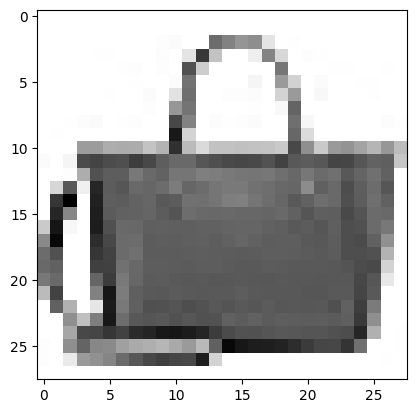

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
# 10개의 클래스에 대한 예측 확률을 출력
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
[[8.83811950e-21 3.57316842e-30 2.05158664e-21 1.10919144e-20
  2.51779384e-20 4.72653749e-21 2.96962868e-21 6.85457018e-22
  1.00000000e+00 6.24684625e-23]]


-> [0]으로 하지 않고, [0:1]라고 쓰는 이유는 케라스의 메서드는 입력의 첫 번째 차원이 배치 차원일 것으로 기대함. 따라서, 샘플 하나를 전달할 때 (28,28,1)이 아니라 (1,28,28,1) 크기를 전달해야함.원소가 하나이더라도 전체 차원이 유지되어 (1,28,28,1) 크기를 생성.

-> 아홉 번째 값이 1이고 다른 값은 거의 0에 가까움.

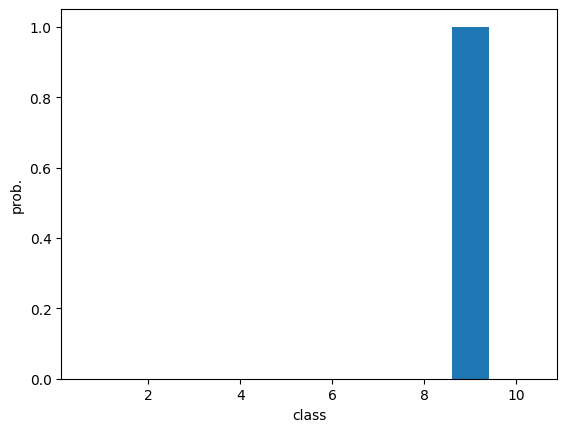

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


### 테스트 세트에 대한 성능을 측정

In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9131 - loss: 0.2671


[0.25479885935783386, 0.9133999943733215]

# 8-3. 합성곱 신경망의 시각화
- 합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는지 이해해보기
- 케라스의 Sequential 클래스만 사용했는데, 함수형 API를 사용하여 좀 더 복잡한 모델 생성해보기


## 가중치 시각화
- 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현함
- ex) 둥근 모서리가 있는 영역에서 크게 활성화되고 그렇지 않은 영역에서는 낮은 값을 만듦.


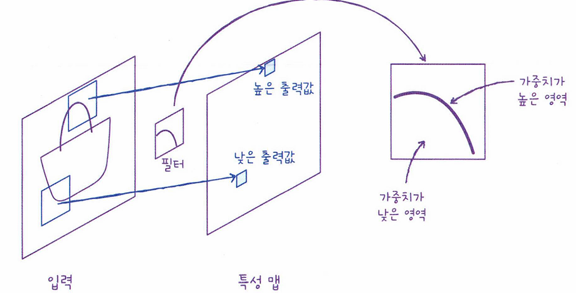

## 체크포인트 파일 읽어들이기
- 앞에서 생성한 모델이 어떤 가중치를 학습했는지 확인하기 위해 체크포인트 파일 읽어들이기

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

In [ ]:
from tensorflow import keras

In [ ]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2024-12-17 01:42:11--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2024-12-17 01:42:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras.1’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.03s   

2024-12-17 01:42:13 (117 MB/s) - ‘best-cnn-model.keras.1’ saved [4038273/4038273]



In [ ]:
# 체크포인트 읽어들이기
model = keras.models.load_model('best-cnn-model.keras')

In [ ]:
# 케라스 모델에 추가한 층은 layers 속성에 리스트 형태로 저장돼있음
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

### 첫 번째 합성곱 층의 가중치 조사
- 가중치와 절편은 층의 weights 속성에 저장돼있음.
- weights의 첫 번째 원소(가중치)와 두 번째 원소(절편)의 크기 출력

In [ ]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


-> 커널 크기 (3,3)으로 지정했었음. 깊이가 1이고 필터 개수 32이므로 가중치 크기 (3,3,1,32)

-> 절편은 필터마다 1개씩 있으므로 (32,)

weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체.
- 다루기 쉽도록 numpy() 메서드를 사용해 넘파이 배열로 변환


In [ ]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.01265089 0.23762846


-> 가중치의 평균값은 0에 가깝고 표준편차는 0.23정도

-> 나중에 이 값을 훈련하기 전의 가중치와 비교할 예정

In [ ]:
import matplotlib.pyplot as plt

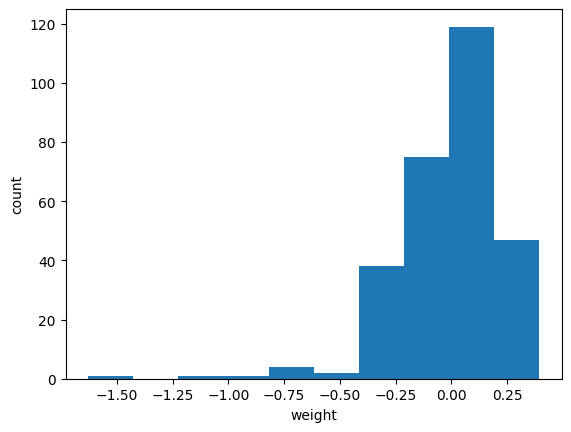

In [ ]:
plt.hist(conv_weights.reshape(-1, 1)) # 히스토그램 그리기 위해 1차원 배열로 전달
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

### 커널 출력
32개의 커널을 16개씩 두 줄에 출력해보기

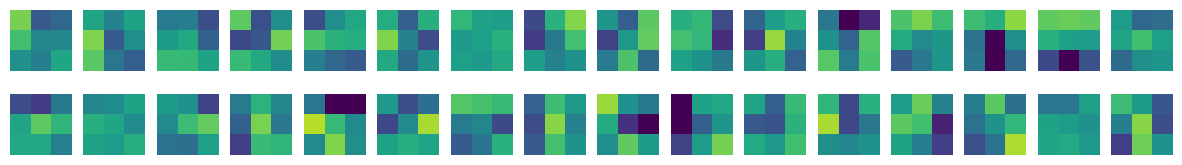

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

-> 앞에서 conv_weights에 32개의 가중치를 저장했음.
- 이 배열의 마지막 차원을 순회하면서 0부터 i*16 + j번째까지의 가중치 값을 차례대로 출력함.

-가중치 값이 무작위로 나열된 것이 아닌 패턴 발견할 수 있음.
- - ex) 첫 번째 줄의 맨 왼쪽 가중치는 오른쪽 3픽셀의 값이 높음. 이 가중치는 오른쪽에 놓인 직선을 만나면 크게 활성화됨.


### 빈 합성곱 신경망 생성하여 비교하기
- 훈련한 가중치와 어떻게 다른지 비교해보자

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
# 모델의 첫 번째 층의 가중치를 변수에 저장
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.0053191613 0.08463709


-> 앞에 훈련했던 모델 가중치와 평균은 동일하지만, 표준편차는 이전과 달리 매우 작음.

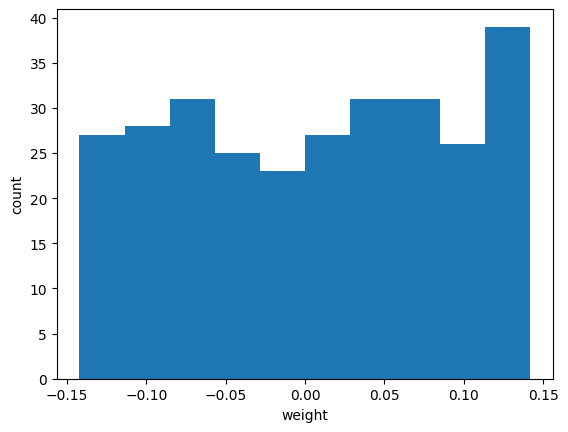

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

-> 처음과 달리 비교적 고른 분포를 보임. 이런 이유는 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문.

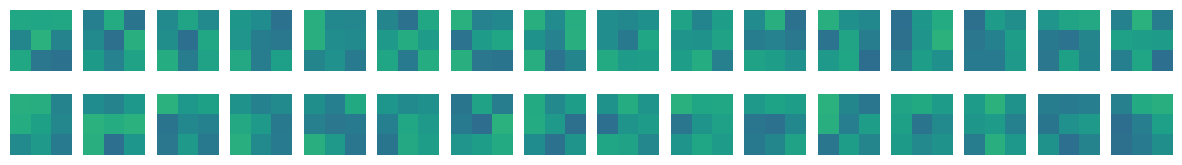

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

-> 이전과 비교하면 전체적으로 가중치가 밋밋하게 초기화됨. 합성곱 신경망이 데이터셋 분류 정확도를 높이기 위해 유용한 패턴을 학습했다는 의미.

### 함수형 API
- sequential 클래스에 층을 쌓은 모델을 만들었지만, 좀 더 복잡한 모델 생성햅기
- ex) 입력이 2개일 수도 있고 출력이 2개일 수도 있음.

In [ ]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [ ]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

## 특성 맵 시각화
- 케라스로 패션 MNIST 데이터셋 읽은 후 훈련 세트에 있는 첫 번째 샘플 그려보기

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

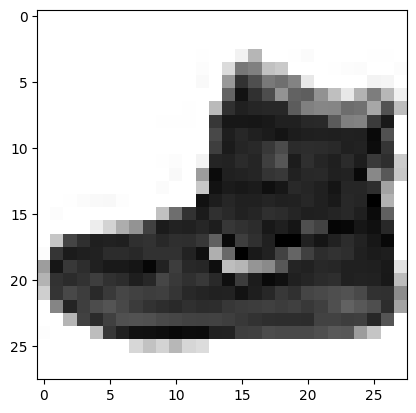

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해보자.

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


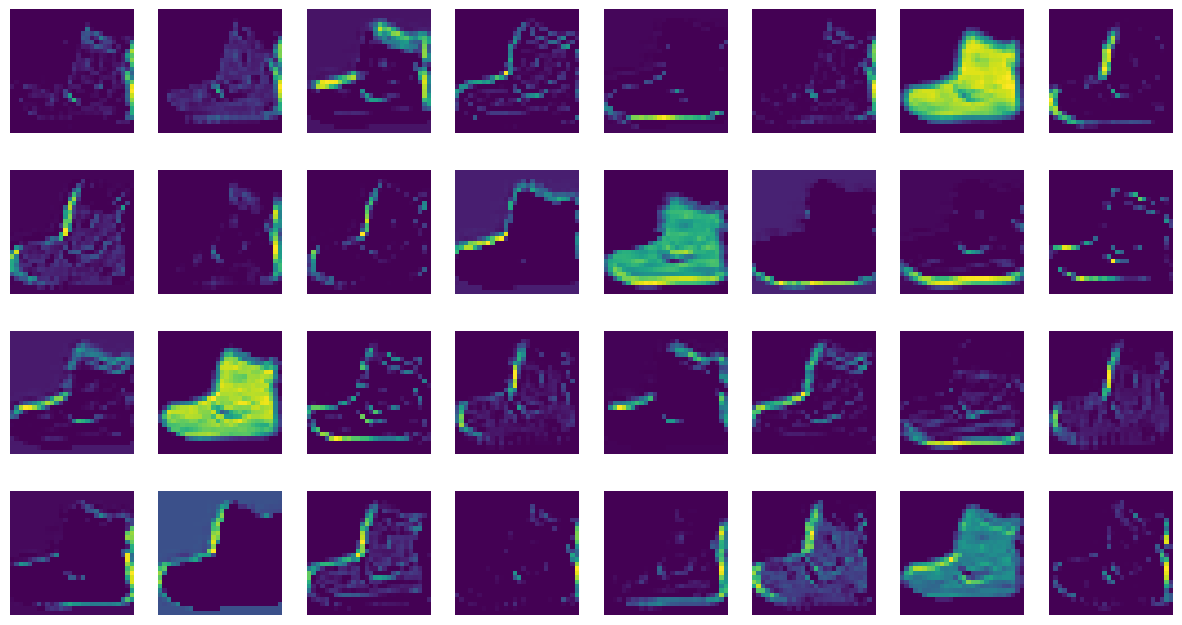

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

-> 첫 번째 필터는 오른쪽에 있는 수직선을 감지함. 첫 번째 특성 맵은 이 필터가 감지한 수직선이 강하게 활성화됨.

-> 세 번째 필터는 전체적으로 밝은색이므로 전면이 모두 칠해진 영역을 감지함. 세 번째 특성 맵에서 이를 잘 확인할 수 있음.

-> 마지막 필터는 전체적으로 낮은 음수 값임. 이 필터와 큰 양수가 곱해지면 더 큰 음수가 되고, 배경처럼 0에 가까운 값과 곱한 후 절편을 더하면 양수가 될 수 있음. = 즉 부츠의 배경이 상대적으로 크게 활성화될 수 있음.

## 두 번째 합성곱 층이 만든 특성 맵


In [ ]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [ ]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


-> 첫 번째 풀링 층에서 가로세로 크기가 절반으로 줄었고, 두 번째 합성곱 층의 필터 개수는 64개이므로 (1,14,14,64)

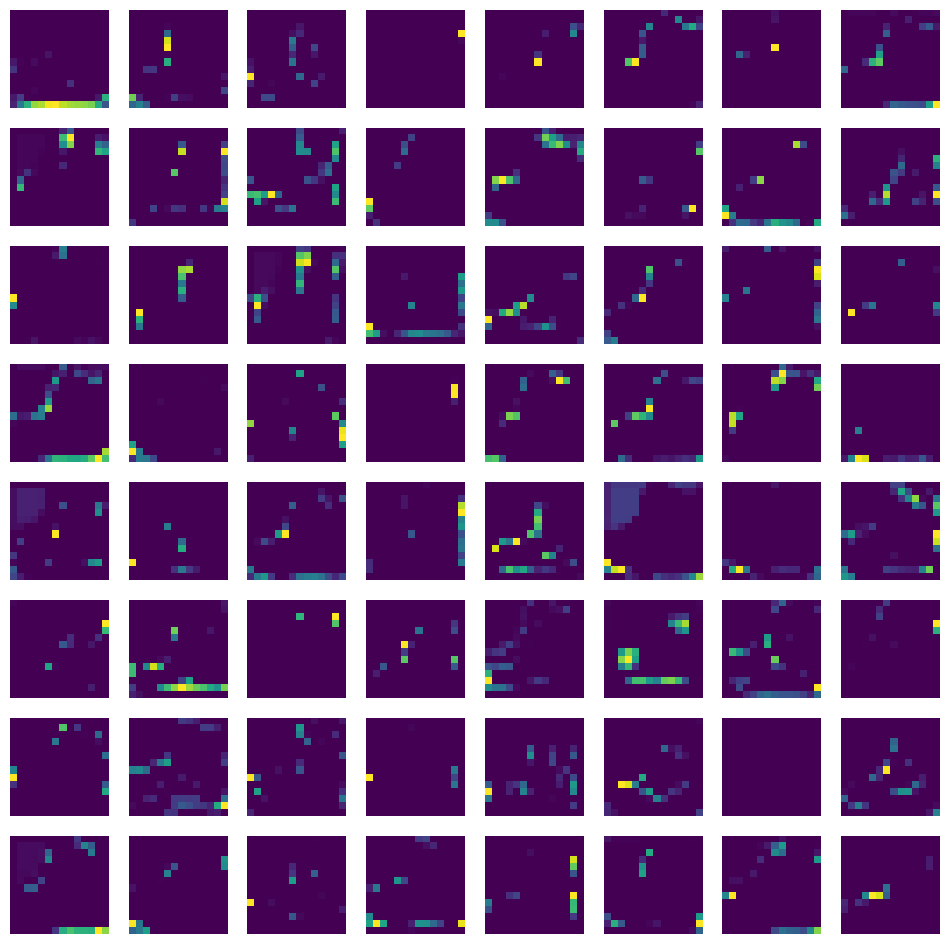

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

-> 이 특성 맵은 시각적으로 이해하기 어려움

- 두 번째 합성곱 층의 첫 번째 필터가 앞서 출력한 32개의 특성 맵과 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 됨.

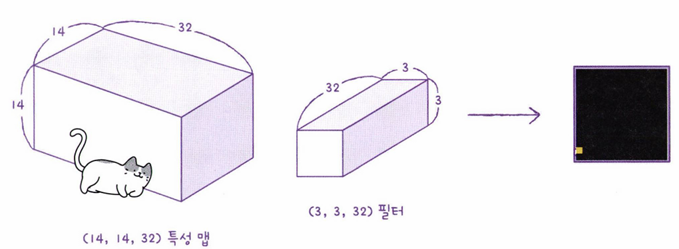

-> 이런 현상은 합성곱 층을 많이 쌓을수록 심해짐.

- 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고, 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습함.

-입력에 가까운 합성곱 층은 이미지에서 시각적인 정보나 패턴을 감지하도록 훈련됨. 이어지는 합성곱 층은 이런 시각적인 정보를 활용해 조금 더 고차원적인 개념을 학습함. 층이 추가될수록 이런 현상은 더욱 강해져 주어진 이미지가 패션 MNIST 데이터셋에 있는 10개의 클래스 중 어떤 것인지를 판단할수 있음.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/DA_week13.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DA_week13.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 812360 bytes to /content/drive/MyDrive/Colab Notebooks/DA_week13.html
